In [17]:
import pandas as pd

In [18]:
def sort_data(filename='test_data.csv', output_filename='sorted_test_data.csv'):
    df = pd.read_csv(filename, parse_dates=['Date'])
    df = df.sort_values(by='Date')
    df.to_csv(output_filename, index=False)

In [19]:
sort_data()

In [20]:
df = pd.read_csv('sorted_test_data.csv')
df.head()

,Date,Equipment_ID,Priority,Duration
0,2023-01-01,2,2,6877
1,2023-01-01,2,1,5979
2,2023-01-01,3,2,9728
3,2023-01-01,1,3,3194
4,2023-01-01,1,1,6003


In [21]:
import matplotlib.pyplot as plt

In [22]:
def plot_equipment_1(filename='sorted_test_data.csv'):
    df = pd.read_csv(filename, parse_dates=['Date'])
    equipment_1_data = df[df['Equipment_ID'] == 1]

    plt.figure(figsize=(10, 6))
    
    plt.plot(equipment_1_data['Date'], equipment_1_data['Duration'], label='Equipment 1')

    plt.title('Equipment 1 Failures')
    plt.xlabel('Date')
    plt.ylabel('Duration (seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()

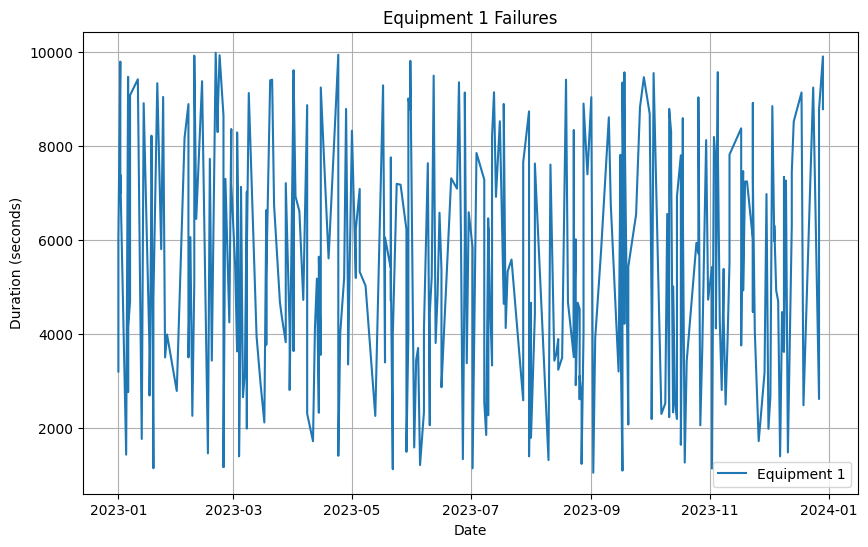

In [23]:
plot_equipment_1()

In [24]:
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [25]:
df = pd.read_csv('sorted_test_data.csv', parse_dates=['Date'])

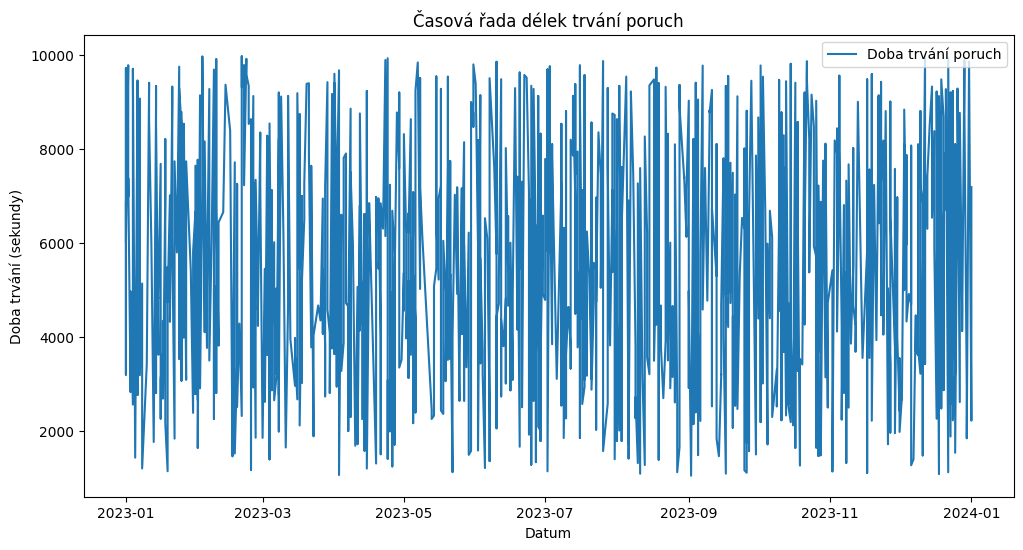

In [26]:
# Analýza časové řady
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Duration'], label='Doba trvání poruch')
plt.title('Časová řada délek trvání poruch')
plt.xlabel('Datum')
plt.ylabel('Doba trvání (sekundy)')
plt.legend()
plt.show()

Test na stacionaritu časové řady je důležitým krokem při analýze časových dat, zejména při přípravě dat pro modelování. Stacionarita znamená, že základní statistické vlastnosti řady, jako jsou průměr nebo variance, jsou konstantní v čase. Nestačionární časové řady mají tendenci mít změny v průměru, trendu nebo sezónnosti, což může ovlivnit výsledky modelování.

Test na stacionaritu obvykle zahrnuje nulovou hypotézu (H0) a alternativní hypotézu (H1):

Nulová hypotéza (H0): Časová řada je nestacionární.
Alternativní hypotéza (H1): Časová řada je stacionární.
Testování na stacionaritu časové řady lze provést různými statistickými metodami, a Augmented Dickey-Fuller test je jednou z nich. Výsledek tohoto testu zahrnuje ADF statistiku a p-hodnotu.

ADF Statistika: Čím nižší hodnota ADF, tím více důkazů máme proti nulové hypotéze (o nestacionaritě). Nižší hodnota ADF naznačuje vyšší pravděpodobnost, že můžeme zamítnout nulovou hypotézu a přijmout, že řada je stacionární.

p-hodnota: P-hodnota poskytuje pravděpodobnost toho, že můžeme zamítnout nulovou hypotézu. Pokud je p-hodnota nižší než určená hladina významnosti (např. 0,05), můžeme zamítnout nulovou hypotézu ve prospěch alternativní hypotézy.

Hodnoty ADF testu a p-hodnoty mohou být interpretovány takto:

Pokud je ADF Statistika menší než kritická hodnota a p-hodnota je nižší než hladina významnosti, můžeme zamítnout nulovou hypotézu a přijmout, že řada je stacionární.

Pokud ADF Statistika je vyšší než kritická hodnota nebo p-hodnota je vyšší než hladina významnosti, nemůžeme zamítnout nulovou hypotézu, což naznačuje, že řada je nestacionární.

In [27]:
# Test na stacionaritu časové řady
result = adfuller(df['Duration'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -10.390003501372568
p-value: 2.0325945542321e-18
Critical Values: {'1%': -3.4369994990319355, '5%': -2.8644757356011743, '10%': -2.5683331327427803}


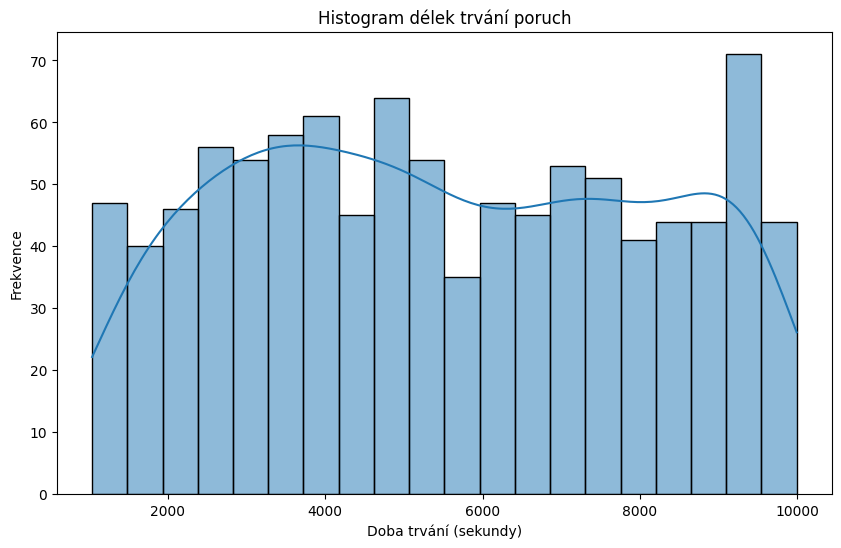

In [28]:
# Histogram délek trvání poruch
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration'], bins=20, kde=True)
plt.title('Histogram délek trvání poruch')
plt.xlabel('Doba trvání (sekundy)')
plt.ylabel('Frekvence')
plt.show()

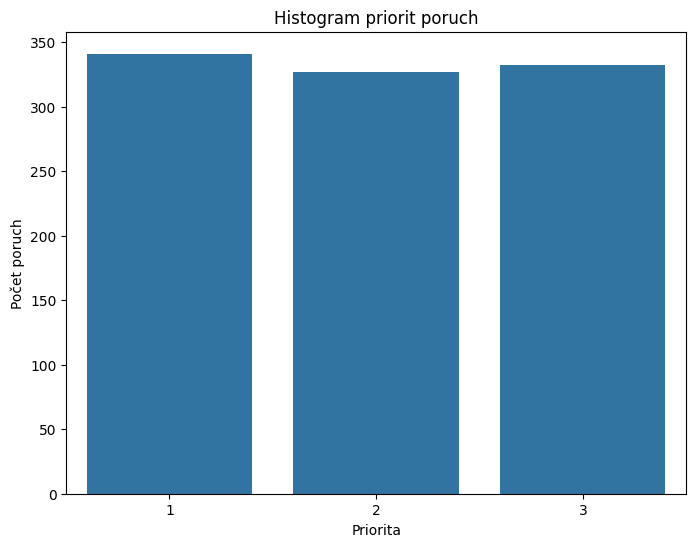

In [29]:
# Histogram priorit poruch
plt.figure(figsize=(8, 6))
sns.countplot(x='Priority', data=df)
plt.title('Histogram priorit poruch')
plt.xlabel('Priorita')
plt.ylabel('Počet poruch')
plt.show()

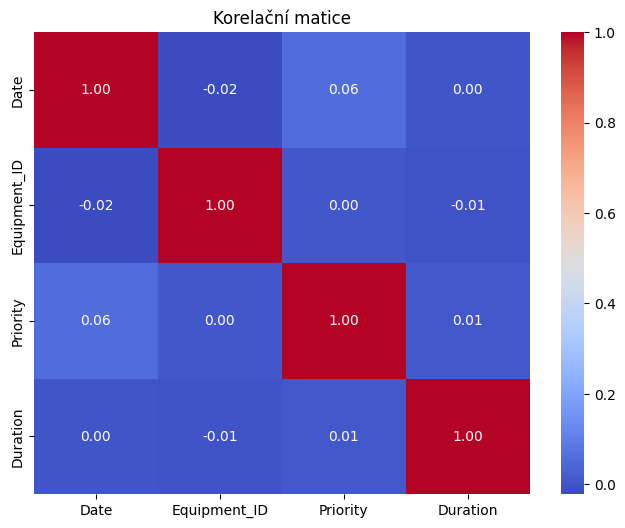

In [30]:
# Korelační matice
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelační matice')
plt.show()

In [31]:
# Zobraz 3 nejvýznamnější páry korelace
most_correlated = correlation_matrix.unstack().sort_values(ascending=False)
most_correlated = most_correlated[most_correlated != 1]  # Vyřaď diagonální hodnoty (korelace se sebou samým)
most_correlated = most_correlated.drop_duplicates()

print("3 nejvýznamnější páry korelace:")
print(most_correlated.head(3))

3 nejvýznamnější páry korelace:
Date          Priority    0.056717
Priority      Duration    0.009169
Equipment_ID  Priority    0.003229
dtype: float64


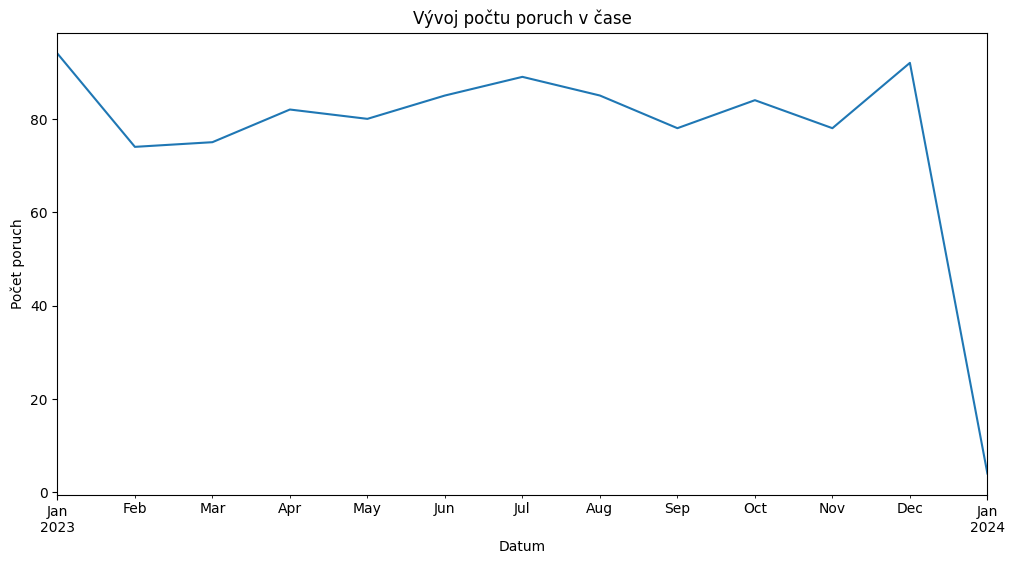

In [32]:
# Vývoj počtu poruch v čase
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
monthly_counts = df.resample('M').size()

plt.figure(figsize=(12, 6))
monthly_counts.plot()
plt.title('Vývoj počtu poruch v čase')
plt.xlabel('Datum')
plt.ylabel('Počet poruch')
plt.show()